# Parsing Tutorial

In this notebook I will be outlining and detailing the steps involved in parsin g a .out file from different amber simulation output files. This is useful to put the data into a more directly utilizable format wherein you can begin to make analytical guesses and confirmations using python to examine your dataframe. One exception is that this script does not parse minimization .out files correctly due to structure issues, other simulation formats work great though.

First step is to import all of the pakcages which serve as dependencies for the script, we will also tell matplotlib to be "inline" meaning graphs will show in our notebook:

In [1]:
%matplotlib inline

In [2]:
import chemparser
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tkinter

Next, I navigate to my desktop which is the folder containing my .out file, you should navigate to the folder containing the .out file you would like to parse.

In [3]:
%cd ~/Desktop

/home/y0ka1/Desktop


Here I use the pipeline from the script to fully parse my file into a dataframe, then I ensure it is useable by assigning the produced dataframe to a variable.

This parse_pl method takes a .out file as input and parses it into a pandas dataframe, this is a data structure built with a python library giving you alot more control over your data.

In [4]:
resultdf = chemparser.parse_pl("cage_anneal.out")

I will disclaim it is this parse_pl method which doesn't work with minimization files due to structural issues. This will most likely be fixed in the future with another script.

Printing out the dataframe to ensure this worked correctly.

In [17]:
resultdf

,NSTEP,TIME(PS),TEMP(K),PRESS,Etot,EKtot,EPtot,BOND,ANGLE,DIHED,...,1-4 EEL,VDWAALS,EELEC,EHBOND,RESTRAINT,EKCMT,VIRIAL,VOLUME,Density,SNSTEP
0,0.0,0.0,298.54,-25.4,-64044.5947,33815.0520,-97859.6467,298.8470,4478.1285,20315.07471,...,-227658.7050,-4987.7231,107228.5149,0.0,0.0,1300.9111,3496.6094,4.000858e+06,0.0912,500000.0
1,1000.0,1.0,298.23,-27.1,-31010.4859,33780.1633,-64790.6491,11691.3724,19189.5053,24416.19771,...,-227606.9816,-3350.9191,107701.8610,0.0,0.0,1367.6852,3708.1044,3.997727e+06,0.0913,500000.0
2,2000.0,2.0,298.60,-36.4,-31746.9815,33822.8658,-65569.8473,11858.9485,19150.4757,24183.31761,...,-227649.4271,-3292.4724,107034.4784,0.0,0.0,1408.7222,4547.5143,3.993212e+06,0.0914,NaN
3,3000.0,3.0,299.63,-23.7,-32449.3029,33939.1145,-66388.4174,11765.3518,19307.7593,24172.00171,...,-227629.2096,-3292.3662,106135.7531,0.0,0.0,1360.0924,3402.5645,3.987965e+06,0.0915,NaN
4,4000.0,4.0,298.93,-25.6,-33324.5414,33860.0808,-67184.6222,11772.4028,19375.6125,24119.22651,...,-227525.6512,-3483.1235,105407.9799,0.0,0.0,1394.1289,3592.6316,3.983073e+06,0.0916,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496000.0,496.0,295.59,-33.9,-53002.2639,33481.0293,-86483.2931,11899.6729,19077.4011,23673.70541,...,-227769.0661,-11178.5392,94608.0765,0.0,0.0,1307.6878,3146.3861,2.509911e+06,0.1454,NaN
497,497000.0,497.0,297.67,-36.5,-52705.2021,33717.4241,-86422.6262,11861.0978,19176.1552,23786.62381,...,-227616.4225,-11173.4114,94392.0032,0.0,0.0,1329.8745,3303.6291,2.507605e+06,0.1456,NaN
498,498000.0,498.0,296.88,-13.2,-52939.9273,33627.0130,-86566.9403,11746.9153,19148.8298,23622.38601,...,-227680.4977,-11007.4072,94437.4751,0.0,0.0,1320.1700,2034.3498,2.504743e+06,0.1457,NaN
499,499000.0,499.0,298.38,-31.4,-53042.9987,33797.0695,-86840.0682,11763.3488,19074.8877,23635.88341,...,-227660.4802,-11202.2876,94389.0431,0.0,0.0,1342.8400,3036.5735,2.501681e+06,0.1459,NaN


Here I give examples of some of the types of graph which can be made with the new dataframe:

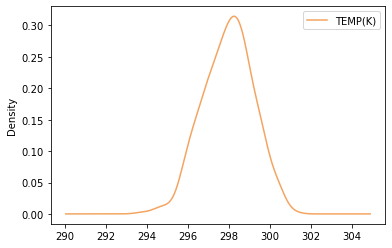

In [15]:
plotty = resultdf.plot.density(x = 'TIME(PS)', y = 'TEMP(K)', color='sandybrown')

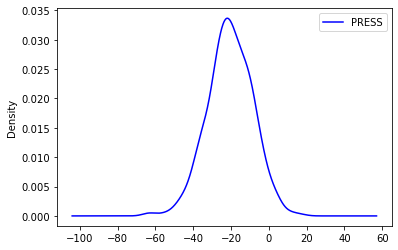

In [26]:
plotty2 = resultdf.plot.density(x = 'TIME(PS)', y = 'PRESS', color='blue')

(array([ 2.92475239e-17, -3.13579737e+00, -1.31698329e+00,  1.21816082e+00,
        -1.33394311e+00,  8.11554988e-01,  4.32636797e-02, -2.58689072e+00,
         2.27727497e-01,  2.48792519e+00,  5.60287380e+00,  2.51209517e+00,
         6.46614875e-01, -1.62664007e+00, -8.04514256e-01, -4.74105752e-01,
        -2.53400637e+00, -4.79779948e+00, -7.33632105e+00, -4.26791389e+00,
        -2.97264959e+00, -1.37713275e+00, -8.08185381e-01,  2.26443849e+00,
        -7.09543445e-01, -3.17851945e+00, -4.95191491e+00, -2.76652437e+00,
        -1.25820035e-01, -2.76764300e+00, -5.45562066e+00, -6.95511713e+00,
        -9.15882485e+00, -6.03102332e+00, -4.01146632e+00, -2.11896100e+00,
         5.61476973e-01,  3.57701222e-01,  2.61649168e+00,  1.35989741e-01,
        -2.32272282e+00, -4.09519971e+00, -6.63144784e+00, -9.66439738e+00,
        -7.27902293e+00, -4.31383233e+00, -6.98263861e+00, -4.12502953e+00,
        -2.46837949e+00, -2.07639487e+00,  2.24961890e-01,  2.66851022e+00,
        -1.5

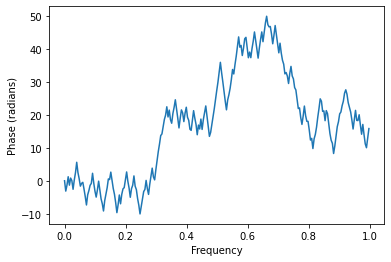

In [22]:
plt.phase_spectrum(resultdf['BOND'])

(array([ 5.26940344e-17, -3.13410548e+00, -7.08299651e-02,  9.09073337e-01,
         9.38096527e-01, -9.28807772e-01, -2.11819047e+00,  3.45840042e-01,
        -2.63814553e+00, -3.31041578e-02,  1.84434147e+00,  4.74279522e+00,
         2.54427169e+00, -2.96901931e-01, -3.19500674e+00, -5.88959068e+00,
        -2.87870109e+00, -5.22040938e+00, -7.78682909e+00, -4.68669453e+00,
        -1.66202172e+00,  1.29671327e+00,  4.30352020e+00,  6.90688688e+00,
         8.97507999e+00,  1.17172894e+01,  1.45069438e+01,  1.32864070e+01,
         1.02727945e+01,  7.13816808e+00,  4.52877876e+00,  3.53333382e+00,
         1.54453970e+00,  9.33025997e-01, -1.20268705e+00, -4.02148394e+00,
        -3.66043530e+00, -6.11587755e+00, -8.71204407e+00, -7.31596148e+00,
        -1.03906444e+01, -1.34570093e+01, -1.06925007e+01, -9.67000467e+00,
        -1.27782136e+01, -1.00011844e+01, -7.59632457e+00, -7.51574994e+00,
        -1.01919819e+01, -1.28417518e+01, -1.09546734e+01, -1.35241117e+01,
        -1.6

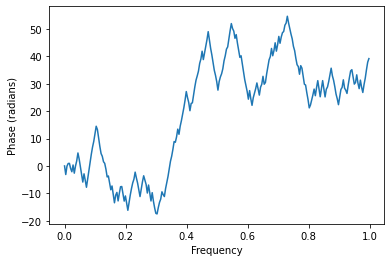

In [23]:
plt.phase_spectrum(resultdf['ANGLE'])

In [27]:
?plt.phase_spectrum